<a href="https://colab.research.google.com/github/paulocarvalhoprcf/dataset-tcc/blob/main/arquivo2_TCC_2025_Univesp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('dataset.csv')
dados['Data'] = pd.to_datetime(dados['Data'])
dados.set_index('Data', inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7951 entries, 1994-07-01 to 2024-12-31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BRL/USD  7951 non-null   float64
 1   S&P500   7951 non-null   float64
 2   XAU/USD  7951 non-null   float64
 3   Crude    7951 non-null   float64
 4   CPI      7951 non-null   float64
 5   IBOV     7951 non-null   int64  
 6   IPCA     7951 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 496.9 KB


In [ ]:
dados.head()

,BRL/USD,S&P500,XAU/USD,Crude,CPI,IBOV,IPCA
Data,,,,,,,
1994-07-01,0.9625,446.2,386.95,17.57,148.4,3581,148.4
1994-07-04,0.9350,446.2,386.95,17.47,148.4,3623,148.4
1994-07-05,0.9250,446.4,386.05,17.38,148.4,3581,148.4
1994-07-06,0.9100,446.1,383.95,17.06,148.4,3564,148.4
1994-07-07,0.9080,448.4,384.65,17.08,148.4,3754,148.4


In [ ]:
dados2 = pd.read_csv('dataset2.csv')
dados2['Data'] = pd.to_datetime(dados2['Data'])
dados2.set_index('Data', inplace=True)
dados2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 2000-07-03 to 2024-12-31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BRL/USD  6390 non-null   float64
 1   EFFR     6390 non-null   float64
 2   SELIC    6390 non-null   float64
dtypes: float64(3)
memory usage: 199.7 KB


In [ ]:
dados2['SELIC - EFFR'] = dados2['SELIC'] - dados2['EFFR']
dados2.head()

,BRL/USD,EFFR,SELIC,SELIC - EFFR
Data,,,,
2000-07-03,1.813,7.03,17.26,10.23
2000-07-04,1.808,7.03,17.22,10.19
2000-07-05,1.802,6.52,17.23,10.71
2000-07-06,1.800,6.51,17.28,10.77
2000-07-07,1.799,6.42,17.28,10.86


In [ ]:
dados_filtrados = dados.loc['2000-07-03':'2024-12-31']
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 2000-07-03 to 2024-12-31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BRL/USD  6390 non-null   float64
 1   S&P500   6390 non-null   float64
 2   XAU/USD  6390 non-null   float64
 3   Crude    6390 non-null   float64
 4   CPI      6390 non-null   float64
 5   IBOV     6390 non-null   int64  
 6   IPCA     6390 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 399.4 KB


In [ ]:
dados_filtrados.head()

,BRL/USD,S&P500,XAU/USD,Crude,CPI,IBOV,IPCA
Data,,,,,,,
2000-07-03,1.813,1469.5,287.90,31.10,172.8,16747,207.12
2000-07-04,1.808,1469.5,286.75,29.58,172.8,17106,207.12
2000-07-05,1.802,1446.2,284.15,29.38,172.8,17285,207.12
2000-07-06,1.800,1456.7,283.50,29.67,172.8,17148,207.12
2000-07-07,1.799,1478.9,283.65,29.70,172.8,17352,207.12


In [ ]:
dados2_unicos = dados2.drop(columns=['BRL/USD'])
dados_unificados = pd.concat([dados_filtrados, dados2_unicos], axis=1)
dados_unificados

,BRL/USD,S&P500,XAU/USD,Crude,CPI,IBOV,IPCA,EFFR,SELIC,SELIC - EFFR
Data,,,,,,,,,,
2000-07-03,1.8130,1469.50,287.90,31.10,172.800,16747,207.12,7.03,17.26,10.23
2000-07-04,1.8080,1469.50,286.75,29.58,172.800,17106,207.12,7.03,17.22,10.19
2000-07-05,1.8020,1446.20,284.15,29.38,172.800,17285,207.12,6.52,17.23,10.71
2000-07-06,1.8000,1456.70,283.50,29.67,172.800,17148,207.12,6.51,17.28,10.77
2000-07-07,1.7990,1478.90,283.65,29.70,172.800,17352,207.12,6.42,17.28,10.86
...,...,...,...,...,...,...,...,...,...,...
2024-12-25,6.1906,6040.04,2613.20,73.58,315.605,122105,354.22,4.33,12.15,7.82
2024-12-26,6.1828,6037.59,2634.43,73.26,315.605,120767,354.22,4.33,12.15,7.82
2024-12-27,6.1964,5970.84,2620.00,74.17,315.605,121078,354.22,4.33,12.15,7.82


In [ ]:
dados_unificados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6390 entries, 2000-07-03 to 2024-12-31
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BRL/USD       6390 non-null   float64
 1   S&P500        6390 non-null   float64
 2   XAU/USD       6390 non-null   float64
 3   Crude         6390 non-null   float64
 4   CPI           6390 non-null   float64
 5   IBOV          6390 non-null   int64  
 6   IPCA          6390 non-null   float64
 7   EFFR          6390 non-null   float64
 8   SELIC         6390 non-null   float64
 9   SELIC - EFFR  6390 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 549.1 KB


In [ ]:
dados_unificados

,BRL/USD,S&P500,XAU/USD,Crude,CPI,IBOV,IPCA,EFFR,SELIC,SELIC - EFFR
Data,,,,,,,,,,
2000-07-03,1.8130,1469.50,287.90,31.10,172.800,16747,207.12,7.03,17.26,10.23
2000-07-04,1.8080,1469.50,286.75,29.58,172.800,17106,207.12,7.03,17.22,10.19
2000-07-05,1.8020,1446.20,284.15,29.38,172.800,17285,207.12,6.52,17.23,10.71
2000-07-06,1.8000,1456.70,283.50,29.67,172.800,17148,207.12,6.51,17.28,10.77
2000-07-07,1.7990,1478.90,283.65,29.70,172.800,17352,207.12,6.42,17.28,10.86
...,...,...,...,...,...,...,...,...,...,...
2024-12-25,6.1906,6040.04,2613.20,73.58,315.605,122105,354.22,4.33,12.15,7.82
2024-12-26,6.1828,6037.59,2634.43,73.26,315.605,120767,354.22,4.33,12.15,7.82
2024-12-27,6.1964,5970.84,2620.00,74.17,315.605,121078,354.22,4.33,12.15,7.82


In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

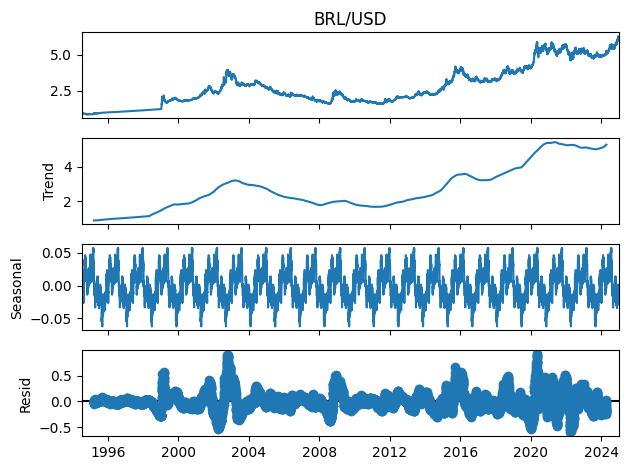

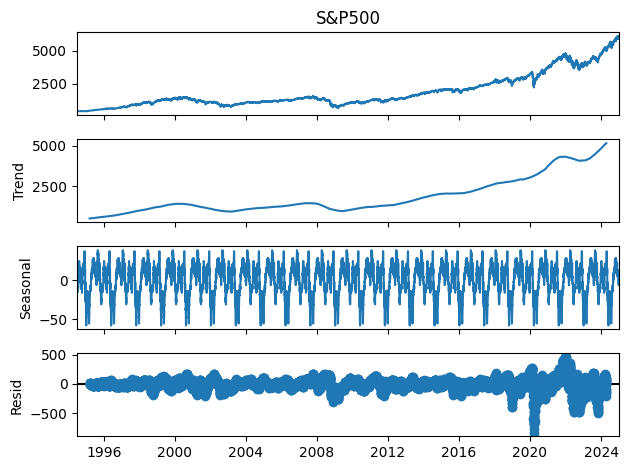

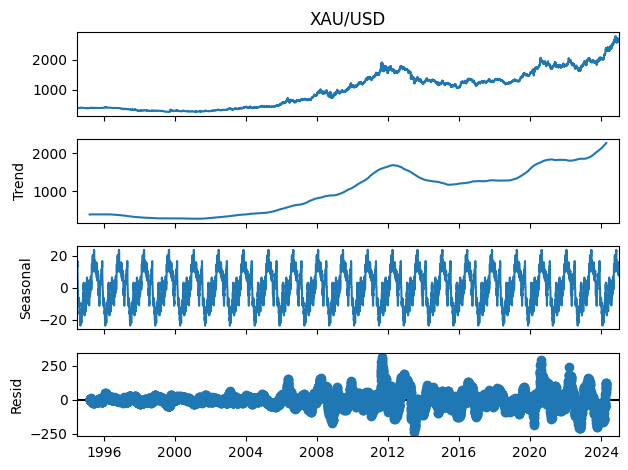

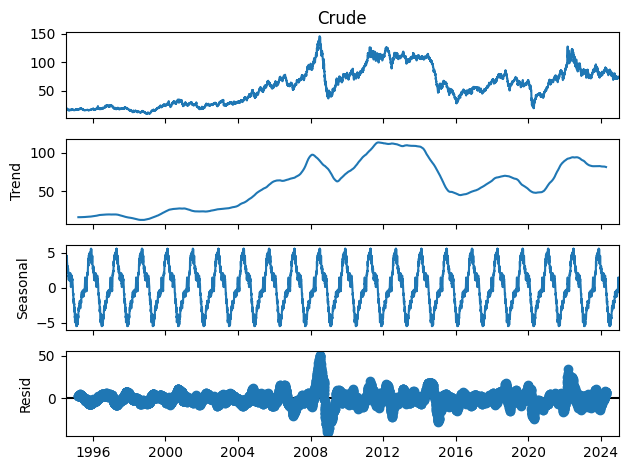

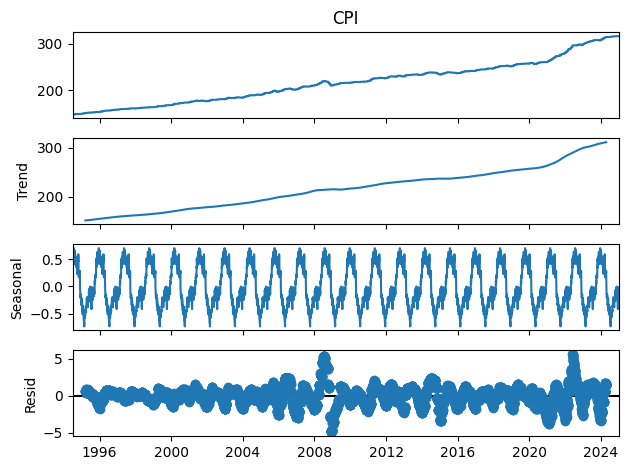

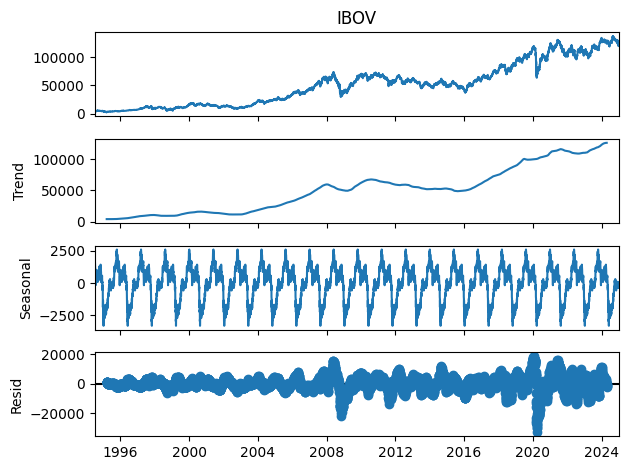

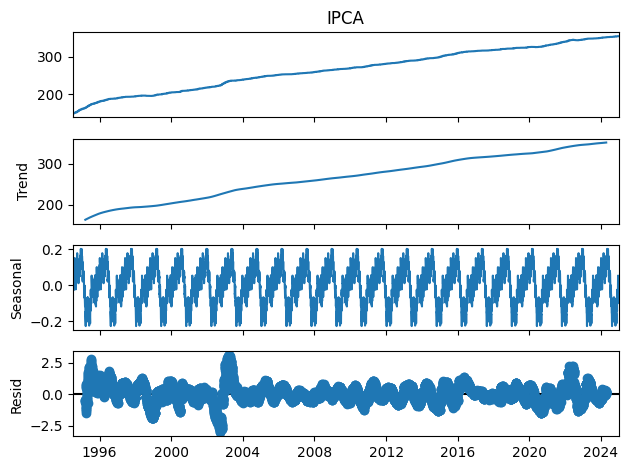

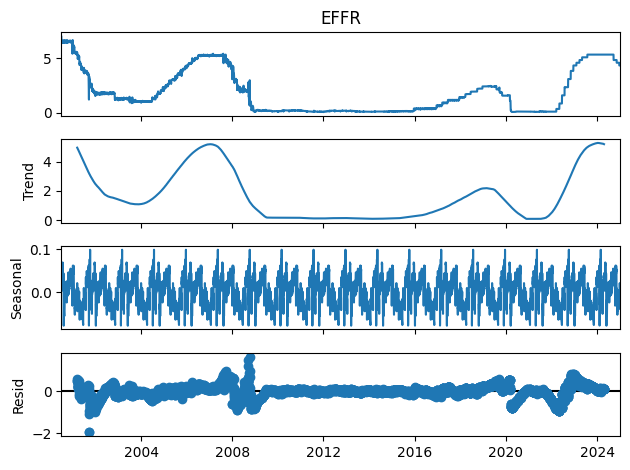

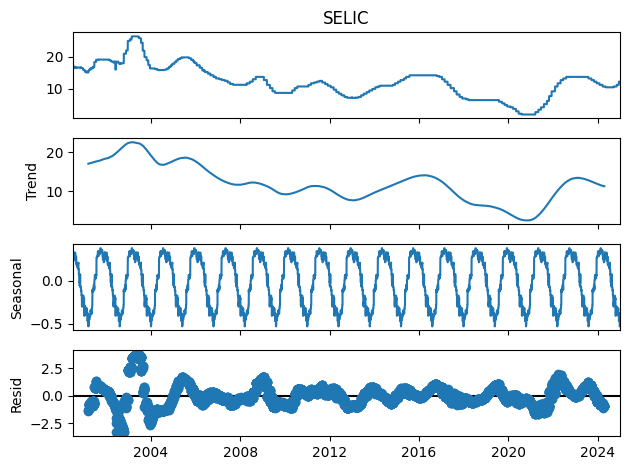

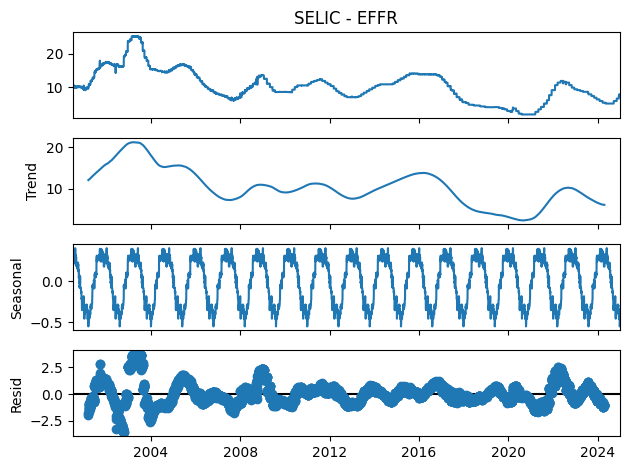

In [ ]:
conjuntos = ['variaveis_1', 'variaveis_2']
variaveis_1 = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA']
variaveis_2 = ['EFFR', 'SELIC', 'SELIC - EFFR']

for i in conjuntos:
  if i == 'variaveis_1':
    dados_internos = dados
    colecao = variaveis_1
  else:
    dados_internos = dados2
    colecao = variaveis_2
  for j in colecao:
    resultado = seasonal_decompose(dados_internos[f'{j}'], model='additive', period=365)
    resultado.plot()
    plt.savefig(f'decompose_{j.replace("/", "_")}')
    plt.show()

Olá! 👋 Posso te ajudar com exemplos de análise de séries históricas utilizando o seasonal_decompose do statsmodels.

O seasonal_decompose é uma função muito útil para decompor uma série temporal em seus componentes: tendência, sazonalidade e resíduos. Isso ajuda na compreensão do comportamento da série e facilita a identificação de padrões.

Segue alguns exemplos de como você pode utilizar o seasonal_decompose:

1. Análise da sazonalidade de vendas de um produto:

Vamos supor que você tenha dados de vendas diárias de um produto ao longo de vários anos. Você pode usar o seasonal_decompose para identificar se existe um padrão sazonal nas vendas, como um aumento nas vendas durante o Natal ou em outras datas comemorativas.

from statsmodels.tsa.seasonal import seasonal_decompose

# 'dados_vendas' é o seu DataFrame com as vendas e a data como índice
resultado = seasonal_decompose(dados_vendas['Vendas'], model='additive', period=365)

# Visualize os componentes
resultado.plot()

Use o código com cuidado

2. Identificação de tendências no número de visitantes de um site:

Se você possui dados do número de visitantes diários de um site, o seasonal_decompose pode te ajudar a identificar se existe uma tendência de crescimento ou queda no número de visitantes ao longo do tempo.

from statsmodels.tsa.seasonal import seasonal_decompose

# 'dados_visitas' é o seu DataFrame com o número de visitas e a data como índice
resultado = seasonal_decompose(dados_visitas['Visitas'], model='additive', period=7) # period=7 para sazonalidade semanal

# Visualize os componentes
resultado.plot()

Use o código com cuidado

3. Análise da sazonalidade no consumo de energia elétrica:

Com dados de consumo de energia elétrica, você pode usar o seasonal_decompose para identificar padrões sazonais, como um aumento no consumo durante o verão devido ao uso de ar condicionado.

from statsmodels.tsa.seasonal import seasonal_decompose

# 'dados_energia' é o seu DataFrame com o consumo de energia e a data como índice
resultado = seasonal_decompose(dados_energia['Consumo'], model='additive', period=365) # period=365 para sazonalidade anual


# Visualize os componentes
resultado.plot()

Use o código com cuidado

Lembre-se:

    Ajustar o parâmetro period: É importante definir o período da sazonalidade de acordo com seus dados. Por exemplo, se você tem dados diários com sazonalidade anual, use period=365.
    Escolher o modelo: O seasonal_decompose oferece dois modelos: additive e multiplicative. O modelo additive é usado quando a sazonalidade é constante ao longo do tempo, enquanto o modelo multiplicative é usado quando a sazonalidade aumenta ou diminui com o tempo.

Espero que esses exemplos te ajudem a utilizar o seasonal_decompose para suas análises de séries históricas! 😉

Ok, vamos explorar os gráficos seasonal e resid produzidos pelo seasonal_decompose e como avaliá-los:

Gráfico Seasonal:

Este gráfico representa o componente sazonal da sua série temporal. Ele mostra os padrões que se repetem ao longo de um determinado período, como dias, semanas, meses ou anos, dependendo do valor que você definiu para o parâmetro period no seasonal_decompose.

Como avaliar:

    Padrões: Observe se existem padrões claros e repetitivos no gráfico. Por exemplo, se você estiver analisando dados de vendas semanais, pode ver picos nas vendas aos finais de semana e quedas durante a semana.
    Amplitude: Verifique a amplitude da sazonalidade, ou seja, a diferença entre os valores mais altos e mais baixos do padrão sazonal. Uma amplitude maior indica uma sazonalidade mais forte.
    Frequência: Identifique a frequência da sazonalidade, ou seja, quantas vezes o padrão se repete em um determinado período. Por exemplo, se o padrão se repete a cada 7 dias, a frequência é semanal.
    Consistência: Avalie se o padrão sazonal é consistente ao longo do tempo ou se há variações. Mudanças na amplitude ou frequência podem indicar mudanças no comportamento da série temporal.

Gráfico Resid (Resíduos):

Este gráfico representa os resíduos da decomposição, ou seja, a parte da série temporal que não é explicada pela tendência e pela sazonalidade. Idealmente, os resíduos devem ser aleatórios e sem nenhum padrão.

Como avaliar:

    Aleatoriedade: Verifique se os resíduos parecem aleatórios, sem nenhum padrão claro. Se houver padrões nos resíduos, pode indicar que a decomposição não capturou completamente a estrutura da série temporal.
    Média zero: A média dos resíduos deve ser próxima de zero. Se a média for significativamente diferente de zero, pode indicar a presença de um viés na decomposição.
    Variância constante: A variância dos resíduos deve ser constante ao longo do tempo. Se a variância mudar, pode indicar a presença de heterocedasticidade, o que pode afetar a precisão das previsões.
    Autocorrelação: Verifique se há autocorrelação nos resíduos, ou seja, se os valores dos resíduos em um determinado momento estão correlacionados com os valores em momentos anteriores. A presença de autocorrelação pode indicar que ainda há informações na série temporal que não foram capturadas pela decomposição.

Em resumo:

Ao avaliar os gráficos seasonal e resid, você busca identificar padrões sazonais claros e resíduos aleatórios. Isso indica que a decomposição foi bem-sucedida em separar os componentes da série temporal, o que pode auxiliar na análise e previsão do seu conjunto de dados. 😉


https://rpubs.com/caiocgonc/granger#:~:text=O%20teste%20de%20Granger%20%C3%A9%20utilizado%20para,causa%20Y%2C%20mas%20Y%20n%C3%A3o%20causa%20X.

In [ ]:
correlation_matrix = dados_unificados.corr()
correlation_matrix

,BRL/USD,S&P500,XAU/USD,Crude,CPI,IBOV,IPCA,EFFR,SELIC,SELIC - EFFR
BRL/USD,1.000000,0.879378,0.594043,-0.129413,0.756290,0.698515,0.740357,0.070625,-0.294381,-0.337014
S&P500,0.879378,1.000000,0.792841,0.202790,0.917127,0.885214,0.860869,0.195847,-0.453886,-0.555560
XAU/USD,0.594043,0.792841,1.000000,0.574423,0.923853,0.898471,0.904240,-0.174646,-0.681990,-0.640940
Crude,-0.129413,0.202790,0.574423,1.000000,0.445643,0.460348,0.404000,-0.163256,-0.440931,-0.393584
CPI,0.756290,0.917127,0.923853,0.445643,1.000000,0.936735,0.969089,0.010327,-0.570181,-0.600482
IBOV,0.698515,0.885214,0.898471,0.460348,0.936735,1.000000,0.911161,0.019653,-0.702117,-0.742297
IPCA,0.740357,0.860869,0.904240,0.404000,0.969089,0.911161,1.000000,-0.142236,-0.642779,-0.613335
EFFR,0.070625,0.195847,-0.174646,-0.163256,0.010327,0.019653,-0.142236,1.000000,0.305692,-0.093687
SELIC,-0.294381,-0.453886,-0.681990,-0.440931,-0.570181,-0.702117,-0.642779,0.305692,1.000000,0.919303
SELIC - EFFR,-0.337014,-0.555560,-0.640940,-0.393584,-0.600482,-0.742297,-0.613335,-0.093687,0.919303,1.000000


In [ ]:
dados_selecionados = dados_unificados.drop(columns=['SELIC', 'EFFR'])

variaveis = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA', 'SELIC - EFFR']

for i in variaveis:
  resultado_adf = adfuller(dados_selecionados[f'{i}'])
  print(f'Análise de Estacionariedade para {i}:')
  print(f'ADF Statistic: {resultado_adf[0]}')
  print(f'p-value: {resultado_adf[1]}')
  print('Valores críticos:', resultado_adf[4])
  print('------------------------------')

Análise de Estacionariedade para BRL/USD:
ADF Statistic: 0.08247693085287434
p-value: 0.9648441472400525
Valores críticos: {'1%': np.float64(-3.431374257100065), '5%': np.float64(-2.861992632517701), '10%': np.float64(-2.5670109331140742)}
------------------------------
Análise de Estacionariedade para S&P500:
ADF Statistic: 2.5506719215648817
p-value: 0.9990643896718125
Valores críticos: {'1%': np.float64(-3.431378445347648), '5%': np.float64(-2.861994483038544), '10%': np.float64(-2.567011918188529)}
------------------------------
Análise de Estacionariedade para XAU/USD:
ADF Statistic: 0.27091093096758884
p-value: 0.9759698215824241
Valores críticos: {'1%': np.float64(-3.4313739363396754), '5%': np.float64(-2.8619924907939316), '10%': np.float64(-2.5670108576712973)}
------------------------------
Análise de Estacionariedade para Crude:
ADF Statistic: -2.173954624588118
p-value: 0.21583384038008546
Valores críticos: {'1%': np.float64(-3.4313747386176345), '5%': np.float64(-2.8619928

In [ ]:
dados_transformados = dados_selecionados.apply(np.log)
dados_transformados.head()

,BRL/USD,S&P500,XAU/USD,Crude,CPI,IBOV,IPCA,SELIC - EFFR
Data,,,,,,,,
2000-07-03,0.594983,7.292677,5.662613,3.437208,5.152135,9.725974,5.333298,2.325325
2000-07-04,0.592221,7.292677,5.658611,3.387098,5.152135,9.747185,5.333298,2.321407
2000-07-05,0.588897,7.276695,5.649502,3.380314,5.152135,9.757594,5.333298,2.371178
2000-07-06,0.587787,7.283929,5.647212,3.390136,5.152135,9.749637,5.333298,2.376764
2000-07-07,0.587231,7.299054,5.647741,3.391147,5.152135,9.761463,5.333298,2.385086


In [ ]:
variaveis = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA', 'SELIC - EFFR']

for i in variaveis:
  resultado_adf = adfuller(dados_transformados[f'{i}'])
  print(f'Análise de Estacionariedade para {i}:')
  print(f'ADF Statistic: {resultado_adf[0]}')
  print(f'p-value: {resultado_adf[1]}')
  print('Valores críticos:', resultado_adf[4])
  print('------------------------------')

Análise de Estacionariedade para BRL/USD:
ADF Statistic: -0.44904172609844556
p-value: 0.9015829670068587
Valores críticos: {'1%': np.float64(-3.4313760248806426), '5%': np.float64(-2.861993413588082), '10%': np.float64(-2.5670113488956)}
------------------------------
Análise de Estacionariedade para S&P500:
ADF Statistic: 0.7593834724795796
p-value: 0.9909514304028293
Valores críticos: {'1%': np.float64(-3.431376991698968), '5%': np.float64(-2.861993840763728), '10%': np.float64(-2.567011576290944)}
------------------------------
Análise de Estacionariedade para XAU/USD:
ADF Statistic: -1.1140324063554083
p-value: 0.7094436258176077
Valores críticos: {'1%': np.float64(-3.4313739363396754), '5%': np.float64(-2.8619924907939316), '10%': np.float64(-2.5670108576712973)}
------------------------------
Análise de Estacionariedade para Crude:
ADF Statistic: -2.226579091217224
p-value: 0.1967405733790567
Valores críticos: {'1%': np.float64(-3.4313747386176345), '5%': np.float64(-2.861992845

In [ ]:
dados_diferenciados = dados_transformados.diff().dropna()
dados_diferenciados.head()

,BRL/USD,S&P500,XAU/USD,Crude,CPI,IBOV,IPCA,SELIC - EFFR
Data,,,,,,,,
2000-07-04,-0.002762,0.000000,-0.004002,-0.050109,0.0,0.021210,0.0,-0.003918
2000-07-05,-0.003324,-0.015983,-0.009108,-0.006784,0.0,0.010410,0.0,0.049771
2000-07-06,-0.001110,0.007234,-0.002290,0.009822,0.0,-0.007958,0.0,0.005587
2000-07-07,-0.000556,0.015125,0.000529,0.001011,0.0,0.011826,0.0,0.008322
2000-07-10,-0.003341,-0.002234,0.001057,-0.029037,0.0,0.015327,0.0,-0.033711


In [ ]:
variaveis = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA', 'SELIC - EFFR']

for i in variaveis:
  resultado_adf = adfuller(dados_diferenciados[f'{i}'])
  print(f'Análise de Estacionariedade para {i}:')
  print(f'ADF Statistic: {resultado_adf[0]}')
  print(f'p-value: {resultado_adf[1]}')
  print('Valores críticos:', resultado_adf[4])
  print('------------------------------')

Análise de Estacionariedade para BRL/USD:
ADF Statistic: -34.626159615629
p-value: 0.0
Valores críticos: {'1%': np.float64(-3.4313748992241146), '5%': np.float64(-2.861992916231742), '10%': np.float64(-2.567011084141501)}
------------------------------
Análise de Estacionariedade para S&P500:
ADF Statistic: -18.952757673269456
p-value: 0.0
Valores críticos: {'1%': np.float64(-3.4313768304360686), '5%': np.float64(-2.861993769511899), '10%': np.float64(-2.567011538361968)}
------------------------------
Análise de Estacionariedade para XAU/USD:
ADF Statistic: -33.57684677026498
p-value: 0.0
Valores críticos: {'1%': np.float64(-3.4313748992241146), '5%': np.float64(-2.861992916231742), '10%': np.float64(-2.567011084141501)}
------------------------------
Análise de Estacionariedade para Crude:
ADF Statistic: -35.65347834238714
p-value: 0.0
Valores críticos: {'1%': np.float64(-3.4313747386176345), '5%': np.float64(-2.861992845269893), '10%': np.float64(-2.567011046366896)}
---------------

In [ ]:
# Inicializando o modelo VAR com seus dados
model = VAR(dados_diferenciados)

# Seleção do melhor número de lags com base no BIC
lag_order = model.select_order(maxlags=20)  # Você pode ajustar maxlags conforme necessário
print(lag_order.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -80.70      -80.69   8.972e-36      -80.70
1       -81.23     -81.16*   5.262e-36     -81.21*
2       -81.24      -81.10   5.215e-36      -81.19
3       -81.25      -81.04   5.183e-36      -81.17
4       -81.25      -80.97   5.150e-36      -81.16
5       -81.25      -80.90   5.160e-36      -81.13
6       -81.25      -80.84   5.152e-36      -81.11
7       -81.25      -80.76   5.184e-36      -81.08
8       -81.25      -80.70   5.157e-36      -81.06
9       -81.25      -80.63   5.171e-36      -81.04
10      -81.25      -80.57   5.156e-36      -81.01
11      -81.25      -80.49   5.194e-36      -80.98
12      -81.26      -80.43   5.145e-36      -80.97
13      -81.25      -80.36   5.159e-36      -80.94
14      -81.25      -80.29   5.165e-36      -80.92
15      -81.25      -80.22   5.177e-36      -80.89
16      -81.25      -80.15   5.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
max_lag = 2  # Ajuste esse valor conforme necessário

variaveis = ['BRL/USD', 'S&P500', 'XAU/USD','Crude', 'CPI', 'IBOV', 'IPCA', 'SELIC - EFFR']

for i in variaveis:
  for j in variaveis:
    if i != j:
      print('------------------------------')
      print(f'Testando se {i} causa {j}')
      granger_test_result = grangercausalitytests(dados_selecionados[[i, j]], max_lag)
      print('------------------------------')
      print('------------------------------')

------------------------------
Testando se BRL/USD causa S&P500

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4480  , p=0.0021  , df_denom=6386, df_num=1
ssr based chi2 test:   chi2=9.4524  , p=0.0021  , df=1
likelihood ratio test: chi2=9.4454  , p=0.0021  , df=1
parameter F test:         F=9.4480  , p=0.0021  , df_denom=6386, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5294  , p=0.0108  , df_denom=6383, df_num=2
ssr based chi2 test:   chi2=9.0658  , p=0.0107  , df=2
likelihood ratio test: chi2=9.0594  , p=0.0108  , df=2
parameter F test:         F=4.5294  , p=0.0108  , df_denom=6383, df_num=2
------------------------------
------------------------------
------------------------------
Testando se BRL/USD causa XAU/USD

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7104  , p=0.0997  , df_denom=6386, df_num=1
ssr based chi2 test:   chi2=2.7116  , p=0.0996  , df=1
likelihood ratio test: chi

O AIC (Akaike Information Criterion) é usado para selecionar o melhor modelo no teste de causalidade de Granger, ajudando a determinar o número de defasagens (lags) a incluir no modelo VAR (Vector Autoregression). O AIC busca equilibrar o ajuste do modelo com a sua complexidade, penalizando modelos com muitos parâmetros.
Como o AIC é usado no teste de Granger:

    1. Determinar o número de defasagens:
    O AIC ajuda a determinar o número ideal de defasagens (lags) a incluir no modelo VAR. Modelos VAR são utilizados para analisar a relação entre séries temporais, assumindo que o valor presente de uma série é influenciado pelos seus valores passados, bem como pelos valores passados de outras séries.
    2. Modelos com menos defasagens são preferidos:
    O AIC penaliza modelos com mais parâmetros (no caso de modelos VAR, o número de defasagens é um parâmetro), incentivando a escolha de modelos mais simples, desde que o ajuste não seja comprometido significativamente.
    3. Seleção do modelo:
    Ao usar o AIC, calcula-se o valor para diferentes modelos VAR com diferentes números de defasagens. O modelo com o menor valor do AIC é considerado o melhor, ou seja, o modelo que melhor equilibra o ajuste com a complexidade.

Em resumo: O AIC ajuda a escolher o modelo VAR mais adequado para o teste de causalidade de Granger, garantindo que o número de defasagens seja otimizado, evitando overfitting (ajuste excessivo aos dados).
Por que o AIC é importante:

    Evita overfitting:
    Modelos com muitas defasagens podem ajustar-se demasiado aos dados da amostra, o que pode levar a previsões pouco precisas para dados fora da amostra.
    Melhora a interpretabilidade:
    Modelos com menos defasagens são mais fáceis de interpretar e de comunicar.
    Aumenta a robustez:
    Modelos mais simples tendem a ser mais robustos e a gerar previsões mais precisas em diferentes contextos.
